In [19]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import tensorflow as tf
style.use('ggplot')

start = datetime(2011, 1, 1)
end = datetime(2021, 1, 1)
'''
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
'''
df = pd.read_csv('tsla.csv', index_col=0).reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,5.400,5.180,5.368,5.324,6415000.0,5.324
1,2011-01-04,5.390,5.204,5.332,5.334,5937000.0,5.334
2,2011-01-05,5.380,5.238,5.296,5.366,7233500.0,5.366
3,2011-01-06,5.600,5.362,5.366,5.576,10306000.0,5.576
4,2011-01-07,5.716,5.580,5.600,5.648,11239500.0,5.648


In [20]:
df = pd.DataFrame(df[['Date','Adj Close']])
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Adj Close
0,2011-01-03,5.324
1,2011-01-04,5.334
2,2011-01-05,5.366
3,2011-01-06,5.576
4,2011-01-07,5.648


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Adj Close  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [22]:
df.set_index('Date', inplace=True)

In [23]:
df['2015'].head()

<ipython-input-23-87392647c6f5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2015'].head()


,Adj Close
Date,
2015-01-02,43.862000
2015-01-05,42.018002
2015-01-06,42.256001
2015-01-07,42.189999
2015-01-08,42.124001


In [24]:
date_range = df.index.max()-df.index.min()
print(date_range)

3650 days 00:00:00


In [25]:
new_index = pd.date_range(df.index.min(),df.index.max())
df = df.reindex(new_index)

In [26]:
df['Adj Close'].value_counts(dropna=False)

NaN       1134
5.484        4
6.368        3
6.780        3
6.132        3
          ... 
5.724        1
10.656       1
6.146        1
47.028       1
24.454       1
Name: Adj Close, Length: 2354, dtype: int64

In [27]:
df['Adj Close'].interpolate(method='linear', inplace=True)

In [28]:
df['Adj Close'].value_counts(dropna=False)


5.484000      4
5.576000      3
6.132000      3
5.664000      3
43.916000     3
             ..
46.358002     1
39.321999     1
69.517331     1
45.423332     1
114.440002    1
Name: Adj Close, Length: 3472, dtype: int64

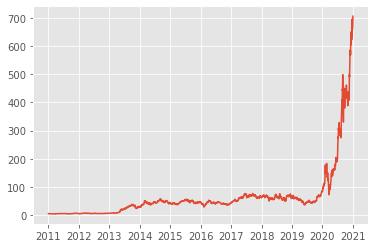

In [29]:
plt.plot(df)

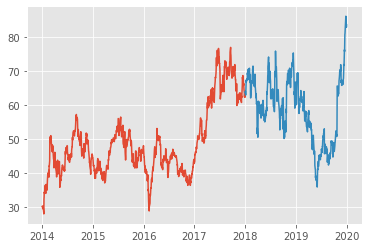

In [30]:
train_data = df['2014':'2017']
test_data = df['2018':'2019']

plt.plot(train_data)
plt.plot(test_data)

In [31]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-n_days:] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Air Quality Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Hour')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)

In [32]:
plot_n_last_days()

TypeError: plot_n_last_days() missing 3 required positional arguments: 'df', 'series_name', and 'n_days'

In [ ]:
learning_rate = 0.001
sequence_length=30
batch_size = 256
epochs = 10

In [36]:
train_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(df,targets=None,sequence_length = sequence_length, batch_size=batch_size)

Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
Input shape: (32, 30, 1)
